In [173]:
# import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
# load dataset
df = pd.read_csv("House_price.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [175]:
# Get info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [176]:
df = df.drop(columns=["ocean_proximity"])

In [177]:
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")

Number of rows: 20640
Number of columns: 9


In [178]:
# Null Values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [179]:
# Remove NUll values
df2 = df.dropna()
df2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [180]:
# Check statistics
desc = df.describe()
desc

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [181]:
# Relation ship between each column
df2.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


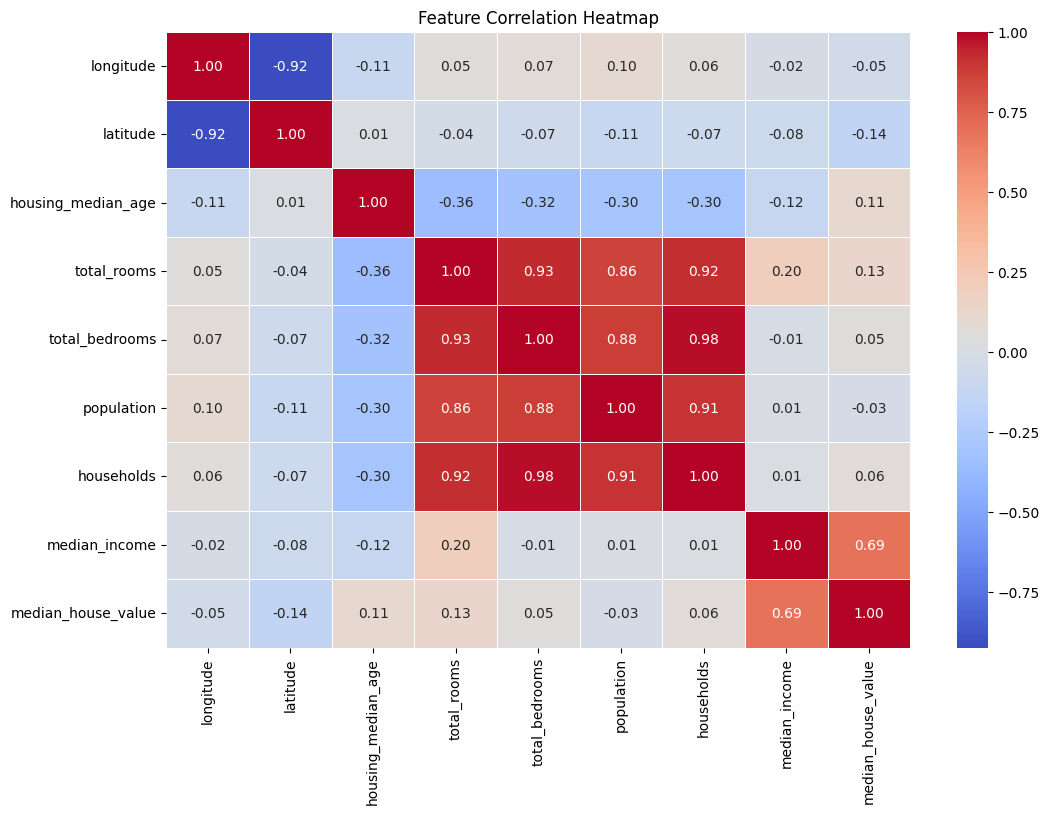

In [182]:
correlation_matrix = df2.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [184]:
# Removing outliers
# Calculate IQR for each column
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR)))

# Remove outliers
df3 = df2[~outliers.any(axis=1)]

print(f"Original data shape: {df2.shape}")
print(f"Data shape after removing outliers: {df3.shape}")

Original data shape: (20433, 9)
Data shape after removing outliers: (17434, 9)


In [185]:
# Save the processed dataset
df3.to_csv("processed_house_price.csv", index=False)

# Linear Regression With One Variable

In [186]:
# Load Dataset for one linear regression with one variable
dataset = df3[["total_rooms", "median_house_value"]]
dataset.head()

,total_rooms,median_house_value
2,1467,352100
3,1274,341300
4,1627,342200
5,919,269700
6,2535,299200


In [187]:
X, y = dataset[["total_rooms"]], dataset[["median_house_value"]]

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [189]:
print("Length of Training Data", len(X_train), len(y_train))
print("Length of Testing Data", len(X_test), len(y_test))

Length of Training Data 13947 13947
Length of Testing Data 3487 3487


In [190]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
X_train[:5], y_train[:5]

(array([[-0.79554464],
        [-0.27935998],
        [-0.56275548],
        [-0.42105773],
        [-0.01252655]]),
       median_house_value
 954               315600
 9652               67500
 1949              146100
 1207               81900
 8354              169800)

In [192]:
# Build and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [193]:
# Evaluate the model
y_pred = model.predict(X_test)

In [194]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 74824.95970461454
Mean Squared Error (MSE): 8767374166.121851
Root Mean Squared Error (RMSE): 93634.25743883406
R² Score: 0.026130070880307832


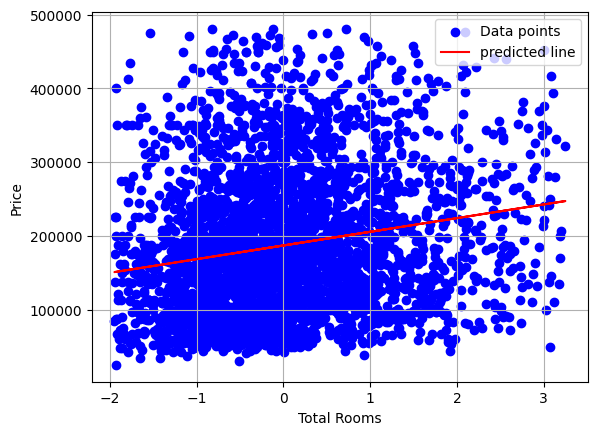

In [195]:
# Visulization
plt.scatter(X_test, y_test, c='b', label="Data points")
plt.plot(X_test, y_pred, c='r', label="predicted line")
plt.xlabel("Total Rooms")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()